<a href="https://colab.research.google.com/github/leokan92/class/blob/main/Aula1_redes_neurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aula 1 - Redes Neurais Artificiais: Exemplo simples

## Importando bibliotecas necessárias

In [20]:
# Importa as bibliotecas necessárias
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import numpy as np
import matplotlib.pyplot as plt

In [7]:

import torch
import torch.nn as nn
import torch.optim as optim

# Define a simple neural network with only one layer
class SimpleNeuralNetwork(nn.Module):
    def __init__(self):
        super(SimpleNeuralNetwork, self).__init__()
        # Input to output layer linear transformation
        self.layer = nn.Linear(2, 1)  # 2 inputs -> 1 output

    def forward(self, x):
        # Forward pass through the layer (no activation function)
        x = self.layer(x)
        return x

# Create an instance of the simple neural network
net = SimpleNeuralNetwork()

# Define a loss function and optimizer
criterion = nn.MSELoss()  # Mean squared error loss
optimizer = optim.SGD(net.parameters(), lr=0.01)  # Stochastic Gradient Descent with a higher learning rate

# Example input data (2 features) and target (expected output)
inputs = torch.tensor([[1.0, 2.0], [2.0, 3.0], [3.0, 4.0]])  # 3 samples, 2 features
targets = torch.tensor([[10.0], [15.0], [20.0]])  # Corresponding targets


In [17]:

# Step 1: Forward pass (compute predictions)
outputs = net(inputs)
print("Outputs before training: ", outputs)

# Step 2: Compute loss (how far predictions are from the target)
loss = criterion(outputs, targets)
print("Loss before backpropagation: ", loss.item())

# Step 3: Perform backpropagation to compute gradients

loss.backward()  # Compute gradients
print("==========================")
# Step 4: Print gradients and weights before the update
print("\nWeights and gradients before update:")
for name, param in net.named_parameters():
    print(f"{name} weights before update:\n{param.data}")
    print(f"{name} gradients:\n{param.grad}")

print("==========================")

# Step 5: Update the weights using the optimizer
optimizer.step()

# Step 6: Print weights after the update
print("\nWeights after update:")
for name, param in net.named_parameters():
    print(f"{name} weights after update:\n{param.data}")
print("==========================")
# Step 7: Forward pass again to see the new outputs after the weight update
outputs = net(inputs)
print("\nOutputs after weight update: ", outputs)

# Step 8: Compute loss (how far predictions are from the target)
loss = criterion(outputs, targets)
print("Loss after backpropagation: ", loss.item())



Outputs before training:  tensor([[4.1009],
        [6.5141],
        [8.9273]], grad_fn=<AddmmBackward0>)
Loss before backpropagation:  76.47188568115234

Weights and gradients before update:
layer.weight weights before update:
tensor([[1.0357, 1.3775]])
layer.weight gradients:
tensor([[ 79.7894, 112.3579]])
layer.bias weights before update:
tensor([0.3101])
layer.bias gradients:
tensor([32.5685])

Weights after update:
layer.weight weights after update:
tensor([[0.2378, 0.2539]])
layer.bias weights after update:
tensor([-0.0155])

Outputs after weight update:  tensor([[0.7301],
        [1.2219],
        [1.7136]], grad_fn=<AddmmBackward0>)
Loss after backpropagation:  203.3865966796875


In [18]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define a simple neural network with 3 layers
class MultiLayerNeuralNetwork(nn.Module):
    def __init__(self):
        super(MultiLayerNeuralNetwork, self).__init__()
        # Input to first hidden layer
        self.layer1 = nn.Linear(2, 3)  # 2 inputs -> 3 hidden neurons
        # First hidden to second hidden layer
        self.layer2 = nn.Linear(3, 2)  # 3 hidden neurons -> 2 hidden neurons
        # Second hidden to output layer
        self.layer3 = nn.Linear(2, 1)  # 2 hidden neurons -> 1 output

    def forward(self, x):
        # Forward pass with ReLU activations
        x = torch.relu(self.layer1(x))  # Activation after layer1
        x = torch.relu(self.layer2(x))  # Activation after layer2
        x = self.layer3(x)  # No activation in the output layer (for simplicity)
        return x

# Create an instance of the neural network
net = MultiLayerNeuralNetwork()

# Define a loss function and optimizer
criterion = nn.MSELoss()  # Mean squared error loss
optimizer = optim.SGD(net.parameters(), lr=0.01)  # Stochastic Gradient Descent

# Example input data (2 features) and target (expected output)
inputs = torch.tensor([[1.0, 2.0], [2.0, 3.0], [3.0, 4.0]], requires_grad=True)  # 3 samples, 2 features
targets = torch.tensor([[10.0], [15.0], [20.0]])  # Corresponding targets

# Step 1: Forward pass (compute predictions)
outputs = net(inputs)
print("Outputs before training: ", outputs)

# Step 2: Compute loss (how far predictions are from the target)
loss = criterion(outputs, targets)
print("Loss before backpropagation: ", loss.item())

# Step 3: Perform backpropagation to compute gradients
optimizer.zero_grad()  # Clear the previous gradients
loss.backward()  # Compute gradients

# Step 4: Print gradients and weights before the update
print("\nWeights and gradients before update:")
for name, param in net.named_parameters():
    print(f"{name} weights before update:\n{param.data}")
    print(f"{name} gradients:\n{param.grad}")

# Step 5: Partial derivatives of the activations (ReLU derivatives)
# ReLU derivative is 1 for x > 0 and 0 for x <= 0
print("\nPartial derivatives of activations (ReLU) during backpropagation:")
with torch.no_grad():
    # Recompute the activations manually for understanding ReLU derivatives
    layer1_output = torch.relu(net.layer1(inputs))
    layer2_output = torch.relu(net.layer2(layer1_output))

    print("Layer 1 ReLU activations:\n", layer1_output)
    print("Layer 1 ReLU derivatives:\n", (layer1_output > 0).float())

    print("Layer 2 ReLU activations:\n", layer2_output)
    print("Layer 2 ReLU derivatives:\n", (layer2_output > 0).float())

# Step 6: Update the weights using the optimizer
optimizer.step()

# Step 7: Print weights after the update
print("\nWeights after update:")
for name, param in net.named_parameters():
    print(f"{name} weights after update:\n{param.data}")

# Step 8: Forward pass again to see the new outputs after the weight update
outputs = net(inputs)
print("\nOutputs after weight update: ", outputs)


Outputs before training:  tensor([[0.2396],
        [0.2349],
        [0.2053]], grad_fn=<AddmmBackward0>)
Loss before backpropagation:  235.03428649902344

Weights and gradients before update:
layer1.weight weights before update:
tensor([[-0.1313, -0.6881],
        [ 0.0513, -0.6873],
        [ 0.1682,  0.4468]])
layer1.weight gradients:
tensor([[0.0000, 0.0000],
        [0.0000, 0.0000],
        [2.6957, 3.6469]])
layer1.bias weights before update:
tensor([-0.1092,  0.5029,  0.1298])
layer1.bias gradients:
tensor([0.0000, 0.0000, 0.9512])
layer2.weight weights before update:
tensor([[-0.1540, -0.0305, -0.3121],
        [ 0.1176, -0.5181,  0.1930]])
layer2.weight gradients:
tensor([[ 0.0000,  0.0000,  1.7998],
        [ 0.0000,  0.0000, 14.3454]])
layer2.bias weights before update:
tensor([0.4795, 0.5056])
layer2.bias gradients:
tensor([1.5103, 7.3718])
layer3.weight weights before update:
tensor([[-0.2321, -0.2495]])
layer3.weight gradients:
tensor([[ -0.7005, -26.0332]])
layer3.bias

#Implementação completa

## Gerando dados de treino e teste

In [21]:
# Gera dados sintéticos baseados em uma função não-linear com ruído
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y = x.pow(3) + 0.3*torch.rand(x.size())

# Converte os arrays numpy para tensores PyTorch
x_tensor = torch.FloatTensor(x)
y_tensor = torch.FloatTensor(y)

# Divide o conjunto de dados em conjuntos de treinamento e teste (80:20)
dataset = TensorDataset(x_tensor, y_tensor)
tamanho_treino = int(0.8 * len(dataset))
tamanho_teste = len(dataset) - tamanho_treino
conjunto_treino, conjunto_teste = random_split(dataset, [tamanho_treino, tamanho_teste])

# DataLoader pode nos ajudar a usar treinamento baseado em lotes, mas para este exemplo vamos usar todo o conjunto de dados em um lote
train_loader = DataLoader(dataset=conjunto_treino, batch_size=tamanho_treino)
test_loader = DataLoader(dataset=conjunto_teste, batch_size=tamanho_teste)


# Definindo arquitetura da rede neural


In [25]:
# Define o modelo MLP
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x)) # Aqui está a utilização da função de ativação (neste caso ReLU)
        x = self.fc2(x)
        return x

input_dim = 1
hidden_dim = 10
output_dim = 1
model = MLP(input_dim, hidden_dim, output_dim)

## Modelo Linear para comparação

Simplesmente utilizamos uma rede neural sem camadas ocultas

In [26]:
# Define o modelo de Regressão Linear
linear_model = nn.Linear(input_dim, output_dim)

# Definição da função de custo (ou perda) e otimizador

In [27]:
# Função de perda e otimizador
criterion = nn.MSELoss()
otimizador_mlp = optim.SGD(model.parameters(), lr=0.01)
otimizador_linear = optim.SGD(linear_model.parameters(), lr=0.01)


## Treino dos modelos

In [28]:
# Lista para armazenar as perdas
historico_perda_mlp = []
historico_perda_linear = []

# Treinamento do MLP
num_epochs = 100
for epoch in range(num_epochs):
    for batch_x, batch_y in train_loader:
        # Passo forward
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)

        # Passo backward e otimização
        otimizador_mlp.zero_grad()
        loss.backward()
        otimizador_mlp.step()

    # Adiciona a perda atual ao histórico
    historico_perda_mlp.append(loss.item())

# Treinamento do modelo de Regressão Linear
for epoch in range(num_epochs):
    for batch_x, batch_y in train_loader:
        outputs = linear_model(batch_x)
        loss = criterion(outputs, batch_y)

        otimizador_linear.zero_grad()
        loss.backward()
        otimizador_linear.step()

    # Adiciona a perda atual ao histórico
    historico_perda_linear.append(loss.item())

## Avaliando Resultados

In [29]:
# Testa os modelos
model.eval()
linear_model.eval()

with torch.no_grad():
    previsoes_mlp = model(x_tensor)
    previsoes_linear = linear_model(x_tensor)

# Calcula a perda de teste para ambos os modelos
perda_mlp = criterion(previsoes_mlp[tamanho_teste:], y_tensor[tamanho_teste:])
perda_linear = criterion(previsoes_linear[tamanho_teste:], y_tensor[tamanho_teste:])

print(f"Perda de Teste do MLP: {perda_mlp.item()}")
print(f"Perda de Teste da Regressão Linear: {perda_linear.item()}")

Perda de Teste do MLP: 0.027289148420095444
Perda de Teste da Regressão Linear: 0.11461468786001205


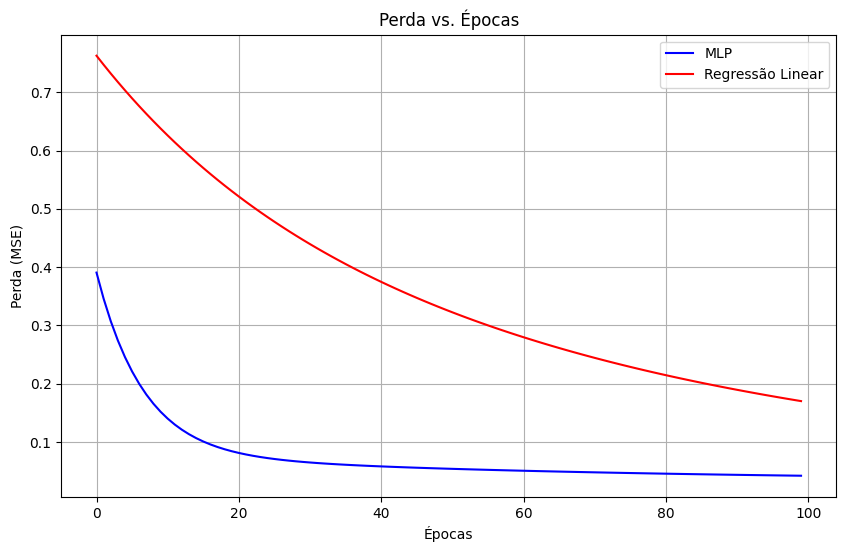

In [30]:
# Plota o histórico de perda
plt.figure(figsize=(10, 6))
plt.plot(historico_perda_mlp, label='MLP', color='blue')
plt.plot(historico_perda_linear, label='Regressão Linear', color='red')
plt.xlabel('Épocas')
plt.ylabel('Perda (MSE)')
plt.legend()
plt.title('Perda vs. Épocas')
plt.grid(True)
plt.show()

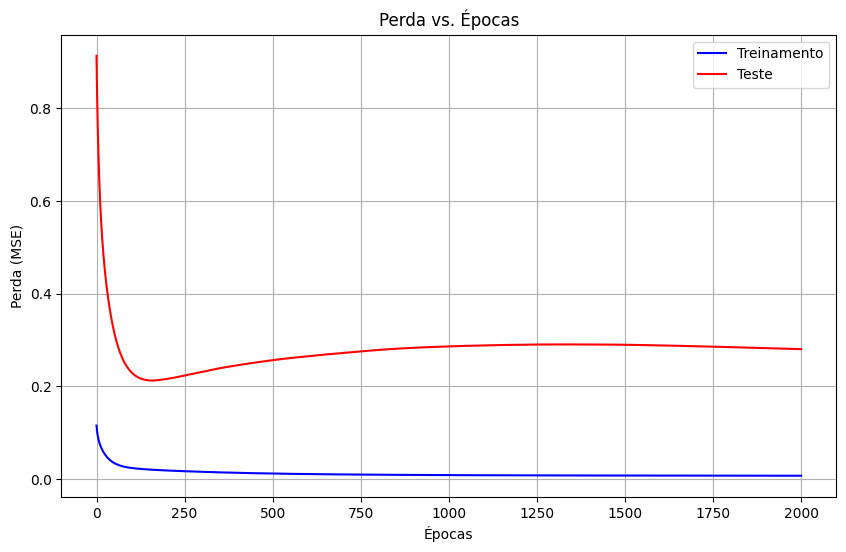

In [ ]:
# Gera dados sintéticos baseados em uma função não-linear com ruído
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y = x.pow(3) + 0.3*torch.rand(x.size())

# Dividindo os dados em treinamento e teste
x_train = x[:80]
y_train = y[:80]
x_test = x[80:]
y_test = y[80:]

# Modelo MLP complexo
class MLPComplexo(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLPComplexo, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )
    def forward(self, x):
        return self.layers(x)

# Modelos
input_dim = 1
hidden_dim = 100
output_dim = 1
modelo_complexo = MLPComplexo(input_dim, hidden_dim, output_dim)

# Critério e otimizador
criterion = nn.MSELoss()
otimizador = torch.optim.SGD(modelo_complexo.parameters(), lr=0.01)

# Treina o modelo complexo
historico_perda_train = []
historico_perda_test = []
for epoch in range(2000):
    predicao_train = modelo_complexo(x_train)
    perda_train = criterion(predicao_train, y_train)

    otimizador.zero_grad()
    perda_train.backward()
    otimizador.step()

    historico_perda_train.append(perda_train.item())

    with torch.no_grad():
        predicao_test = modelo_complexo(x_test)
        perda_test = criterion(predicao_test, y_test)
        historico_perda_test.append(perda_test.item())

# Plota os resultados
plt.figure(figsize=(10, 6))
plt.plot(historico_perda_train, label='Treinamento', color='blue')
plt.plot(historico_perda_test, label='Teste', color='red')
plt.xlabel('Épocas')
plt.ylabel('Perda (MSE)')
plt.legend()
plt.title('Perda vs. Épocas')
plt.grid(True)
plt.show()